### Step-1: 
* To perform data Preprocessing first import pandas, numpy, matplotlib, seaborn.
* To ignore warnings import warnings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Step-2:
* Import the csv or excel file using read_csv or read_excel function to fetch the dataset of the laptops.
* Then create a copy of the file as df, so that the actual data do no get changed and remains as it is.
* To view top 5 rows we use df.head().

In [2]:
data = pd.read_csv("laptops.csv")
df = data.copy()
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


### Step-3:
* df.info returns information of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   object 
 1   TypeOfLaptop      1000 non-null   object 
 2   Inches            1000 non-null   float64
 3   ScreenResolution  1000 non-null   object 
 4   Cpu               1000 non-null   object 
 5   Ram               1000 non-null   object 
 6   Memory            1000 non-null   object 
 7   Gpu               1000 non-null   object 
 8   OpSys             1000 non-null   object 
 9   Weight            1000 non-null   float64
 10  Price             1000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 86.1+ KB


#### Description from above dataset.
* From the above information, there are total - 1000 entries/rows(0-999) and 11 columns.
* From the above data we observe that data type of all the columns are ideal(that means the datatype of the column is proper according to the data inside the column) except Ram and Memory(which is in object(string) but we want it in int datatype).
* So our first task is to change the data type of Ram and Memory.

### Step-4: 
* Returns description of numeric data or columns.

In [4]:
df.describe() # gives description of the numeric data

,Inches,Weight,Price
count,1000.000000,1000.000000,1000.000000
mean,14.496646,3.469800,51602.255339
std,2.066624,0.857112,13802.833231
min,11.005842,2.000819,30060.275100
25%,12.677791,2.720228,40376.617670
50%,14.509298,3.477824,50683.971717
75%,16.313026,4.189891,61897.280126
max,17.998786,4.994556,115137.368077


#### Description from above data
* From the above description we observe that the count for inches, weight, adn price is same i.e., 1000
* Mean of Inches is 14.5 and std. deviation is 2 which means that our screen can be 8 inches, 10inches, 12inches, 16inches, 18inches etc 
* Minimum screen size is 11 inches and 25 % of screen size are under 12.67 inches and maximum screen size is 17.99.
* Here we can see that mean and median(50%) data is almost same, which means that our data is normally distributed.
* Same for Weight and Price, data is normally distributed.

##### Now we have to see what are changes we have to do, to make our data generalize/clean/normalize or denoise.

### Step-5:
* Now we pick first column
* To get the data of a particular column we use df["ColumnName"]value_counts.

In [5]:
# First column
df["CompanyName"].value_counts()

CompanyName
MSI          128
Microsoft    118
Apple        113
lenevo       113
Asus         112
Chuwi        109
Acer         107
Dell         101
hp            99
Name: count, dtype: int64

* As we observe that the name "Chuwi" is not familiar so we will replace chuwi with Samsung. For this we will use replace command.

In [6]:
# Changing name of the company
df["CompanyName"] = df["CompanyName"].replace("Chuwi","Samsung")

In [7]:
# To see if changes are done or not we will use value_count 
df["CompanyName"].value_counts()

CompanyName
MSI          128
Microsoft    118
Apple        113
lenevo       113
Asus         112
Samsung      109
Acer         107
Dell         101
hp            99
Name: count, dtype: int64

### Step-6:

In [8]:
# Second Column -> To view data in typeoflaptop column use value_counts.
df["TypeOfLaptop"].value_counts()

TypeOfLaptop
Business Laptop       176
WorkStation           175
Gaming                168
UltraBook             166
2 in 1 Convertible    162
NoteBook              153
Name: count, dtype: int64

* Here we can see that the name are too long so we will replace them with short names using replace command.

In [9]:
df["TypeOfLaptop"]  = df["TypeOfLaptop"].replace("Business Laptop","Business")
df["TypeOfLaptop"]  = df["TypeOfLaptop"].replace("2 in 1 Convertible","2_in_1")

In [10]:
# Applying value_counts() to see if the changes have been done or not.
df["TypeOfLaptop"].value_counts()

TypeOfLaptop
Business       176
WorkStation    175
Gaming         168
UltraBook      166
2_in_1         162
NoteBook       153
Name: count, dtype: int64

### Step-7: 
* Here the datatype of Inches is float64 , so we will convert it into int64.
* For this we have used ".astype("datatype")" method.

In [11]:
# Third Column
# changing datatype
df["Inches"] = df["Inches"].astype("int64")

In [12]:
# ".dtype" is use to check the datatype of Inches Column.
df["Inches"].dtype

dtype('int64')

### Step-8: 

In [13]:
# Fourth Column -> To see data of column we will use value_counts method.
df["ScreenResolution"].value_counts()

ScreenResolution
2K                                           181
4K                                           179
IPS Panel Full HD / Touchscreen 1920x1080    176
Full HD                                      162
HD 1920x1080                                 160
IPS Panel Retina Display 2560x1600           142
Name: count, dtype: int64

* Here we can observe that the names are too long so we decided to convert the name in shorter format.

In [14]:
# changing long names of screen resolution colmn
df["ScreenResolution"] = df["ScreenResolution"].replace("IPS Panel Full HD / Touchscreen 1920x1080", "TouchScreen")
df["ScreenResolution"] = df["ScreenResolution"].replace("HD 1920x1080", "HD")
df["ScreenResolution"] = df["ScreenResolution"].replace("IPS Panel Retina Display 2560x1600", "Retina Display")

In [15]:
# Applying value_counts() to see if the changes have been done or not.
df["ScreenResolution"].value_counts()

ScreenResolution
2K                181
4K                179
TouchScreen       176
Full HD           162
HD 1920x1080      160
Retina Display    142
Name: count, dtype: int64

### Step-9:

In [16]:
# Fifth Column name -> To view data in cpu column
df["Cpu"].value_counts()

Cpu
Intel Xeon E3-1505M               114
Intel Atom x5-Z8550               111
Intel Core i5                     105
Intel Pentium Quad Core N4200     101
Intel Celeron Dual Core 3855U      98
Intel Core i7                      96
Intel Core i9                      95
AMD Ryzen 5                        94
AMD Ryzen 7                        94
AMD A9-Series 9420                 92
Name: count, dtype: int64

* Here we can observe that the names are too long so will convert the name in shorter format.

In [17]:
df["Cpu"] = df["Cpu"].replace("Intel Xeon E3-1505M ","Intel Xeon")
df["Cpu"] = df["Cpu"].replace("Intel Atom x5-Z8550","Intel Atom")
df["Cpu"] = df["Cpu"].replace("Intel Core i7","Intel i7")
df["Cpu"] = df["Cpu"].replace("Intel Core i5","Intel i5")
df["Cpu"] = df["Cpu"].replace("Intel Core i9","Intel i9")
df["Cpu"] = df["Cpu"].replace("Intel Pentium Quad Core N4200","Intel Pentium")
df["Cpu"] = df["Cpu"].replace("Intel Celeron Dual Core 3855U ","Intel Celeron")
df["Cpu"] = df["Cpu"].replace("AMD Ryzen 5","AMD 5")
df["Cpu"] = df["Cpu"].replace("AMD Ryzen 7","AMD 7")
df["Cpu"] = df["Cpu"].replace("AMD A9-Series 9420","AMD A9")

In [18]:
# Applied value_counts() to confirm the changes.
df["Cpu"].value_counts()

Cpu
Intel Xeon       114
Intel Atom       111
Intel i5         105
Intel Pentium    101
Intel Celeron     98
Intel i7          96
Intel i9          95
AMD 5             94
AMD 7             94
AMD A9            92
Name: count, dtype: int64

### Step-10:

In [19]:
# Sixth Column -> To view data in Ram column
df["Ram"].value_counts()

Ram
8GB     270
12GB    247
4GB     243
16GB    240
Name: count, dtype: int64

* Now as we can see Ram is given as 8GB, 12GB etc so to we want to remove GB.
* For this we replace GB with blank space " ".

In [20]:
# replacing GB with blank space " "
df["Ram"] = df["Ram"].str.replace("GB","")

In [21]:
# changing datatyoe of Ram to int64.
df["Ram"] = df["Ram"].astype("int64")

In [22]:
# Checking if the values or changes got updated or not.
df["Ram"].value_counts()

Ram
8     270
12    247
4     243
16    240
Name: count, dtype: int64

### Step-12:

In [23]:
# Seventh Column -> Data in memory column
df["Memory"].value_counts()

Memory
1TB HDD                105
2TB SATA SSD            63
1TB SSHD                61
4TB HDD                 60
512GB eMMC              59
128GB PCIe SSD          58
1TB NVMe SSD            55
256GB PCIe SSD          55
512GB NVMe SSD          54
512GB SSD               51
256GB SSD               50
2TB HDD                 50
1TB Fusion Drive        50
2TB NVMe SSD            49
256GB Flash Storage     46
6TB HDD                 45
256GB eMMC              45
128GB SSD               44
Name: count, dtype: int64

* From the data in the memory column we understand that some names are too big in length, which can create problem, therefore we will make them short using "replace".
* Also we can see that there are two of memory ssd and hdd, so we will create two seperate columns for both.                     
* Also we will take care of spaces and text while making them short.                                                                 

In [24]:
df["Memory"] = df["Memory"].str.replace("SATA ","")
df["Memory"] = df["Memory"].str.replace("SSHD","SSD")
df["Memory"] = df["Memory"].str.replace("eMMC","SSD")
df["Memory"] = df["Memory"].str.replace("PCIe ","")
df["Memory"] = df["Memory"].str.replace("NVMe ","")
df["Memory"] = df["Memory"].str.replace("Fusion Drive","HDD")
df["Memory"] = df["Memory"].str.replace("Flash Storage","SSD")

In [25]:
# Checking is the values or changes got updated or not.
df["Memory"].value_counts()

Memory
256GB SSD    196
512GB SSD    164
1TB HDD      155
1TB SSD      116
2TB SSD      112
128GB SSD    102
4TB HDD       60
2TB HDD       50
6TB HDD       45
Name: count, dtype: int64

In [26]:
# creating a list which consist SSD in their text otherwise make it 0.
## here x[:-3] -> counts values from the end as -1,-2,-3 till -3 there are hdd there we 
# will leave those and check from -3 to whole list.
dummy_ssd = list(map(lambda x: x[:-3] if x[-3:] == "SSD" else "0", df["Memory"]))

In [27]:
len(dummy_ssd)

1000

In [28]:
# creating a list which consits HDD in their names otherwise make it 0.
dummy_hdd = list(map(lambda x: x[:-3] if x[-3:] == "HDD" else "0", df["Memory"]))

In [29]:
len(dummy_hdd)

1000

In [30]:
# Assigning variable and creating two seperate columns as SSD and HDD.
df["SSD"] = dummy_ssd
df["HDD"] = dummy_hdd

In [31]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD
0,MSI,Business,17,Retina Display,Intel i7,12,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371,512GB,0
1,Samsung,2_in_1,16,Full HD,Intel i5,12,128GB SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051,128GB,0
2,hp,WorkStation,17,Full HD,Intel Xeon,8,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341,0,1TB
3,MSI,2_in_1,11,2K,Intel i7,16,512GB SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486,512GB,0
4,Microsoft,Gaming,12,Full HD,Intel i5,8,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566,512GB,0


### Step-13: 

In [32]:
# No use of memory column therefore dropping the column 
df.drop("Memory", axis = 1, inplace=True)

In [33]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD
0,MSI,Business,17,Retina Display,Intel i7,12,Intel Iris Xe Graphics,Linux,2.064834,35844.099371,512GB,0
1,Samsung,2_in_1,16,Full HD,Intel i5,12,Intel Iris Xe Graphics,No OS,4.060656,37019.059051,128GB,0
2,hp,WorkStation,17,Full HD,Intel Xeon,8,Intel Iris Xe Graphics,Linux,2.901689,33329.360341,0,1TB
3,MSI,2_in_1,11,2K,Intel i7,16,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486,512GB,0
4,Microsoft,Gaming,12,Full HD,Intel i5,8,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566,512GB,0


In [34]:
# Here we can see there are GB and TB both in SSD therefore we will convert TB into GB by Tb value*1024(1tb = 1024gb)
df["SSD"].value_counts()

SSD
0         310
256GB     196
512GB     164
1TB       116
2TB       112
128GB     102
Name: count, dtype: int64

In [35]:
# to remove GB and TB from SSD column
# and to keep in a single scale TB values are multiplied by 1024
ssd = []
for i in df["SSD"]:
    if "GB" in i:
        ssd.append(int(i.replace("GB","")))
    elif "TB" in i:
        ssd.append(int(i.replace("TB",""))*1024)
    else:
        ssd.append(int(i))

In [36]:
# updating SSD column value from list named ssd.
df["SSD"] == ssd

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: SSD, Length: 1000, dtype: bool

In [37]:
df["SSD"].dtype

dtype('O')

In [38]:
df["HDD"].value_counts()

HDD
0       690
1TB     155
4TB      60
2TB      50
6TB      45
Name: count, dtype: int64

In [39]:
# as we can see that the values in HDD columns are only in TB,
# so we will replace TB with " " blank space to remove TB text using  ".str.replace()".
df["HDD"] = df["HDD"].str.replace("TB","")

In [40]:
# Now converting the data in HDD from TB to GB by multiplying by * 1024 and changing datatype into int64
df["HDD"] = df["HDD"].astype("int64")*1024

In [41]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD
0,MSI,Business,17,Retina Display,Intel i7,12,Intel Iris Xe Graphics,Linux,2.064834,35844.099371,512GB,0
1,Samsung,2_in_1,16,Full HD,Intel i5,12,Intel Iris Xe Graphics,No OS,4.060656,37019.059051,128GB,0
2,hp,WorkStation,17,Full HD,Intel Xeon,8,Intel Iris Xe Graphics,Linux,2.901689,33329.360341,0,1024
3,MSI,2_in_1,11,2K,Intel i7,16,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486,512GB,0
4,Microsoft,Gaming,12,Full HD,Intel i5,8,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566,512GB,0


### Step-14: 

In [42]:
# Eigth Column -> Data in Gpu column
df["Gpu"].value_counts()

Gpu
NVIDIA GeForce GTX 1650    348
AMD Radeon RX 5600M        339
Intel Iris Xe Graphics     313
Name: count, dtype: int64

* As we can see that the Gpu has too long names hence we will change this by lambda function.
* As we can see that there are only few names in the gpu that's why we will use lambda function and apply condition for names like for first name we take only 6 alphabets from starting if it starts from N and so on for other names. 

In [43]:
gpu = list(map(lambda x: x[:6] if x[0] == "N" else (x[:3] if x[0]=="A" else x[:5]), df["Gpu"]))

In [44]:
# Editing the column Gpu by giving it value of gpu variable
df["Gpu"]= gpu

In [45]:
df["Gpu"].value_counts()

Gpu
NVIDIA    348
AMD       339
Intel     313
Name: count, dtype: int64

In [46]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD
0,MSI,Business,17,Retina Display,Intel i7,12,Intel,Linux,2.064834,35844.099371,512GB,0
1,Samsung,2_in_1,16,Full HD,Intel i5,12,Intel,No OS,4.060656,37019.059051,128GB,0
2,hp,WorkStation,17,Full HD,Intel Xeon,8,Intel,Linux,2.901689,33329.360341,0,1024
3,MSI,2_in_1,11,2K,Intel i7,16,Intel,Windows 10,2.914843,68631.102486,512GB,0
4,Microsoft,Gaming,12,Full HD,Intel i5,8,AMD,Windows 10,4.341995,33842.479566,512GB,0


### Step-15: 

In [47]:
# Ninth Column -> Data in OpSys column
df["OpSys"].value_counts()

OpSys
No OS         224
macOS         219
Windows 10    194
Linux         187
Windows 11    176
Name: count, dtype: int64

* Changing the long names into short using ".str.replace()".

In [48]:
df["OpSys"] = df["OpSys"].str.replace("No ","D")
df["OpSys"] = df["OpSys"].str.replace("Windows ","Win")

In [49]:
# To view the unique values of Opsys we applied ".unique()" method.
df["OpSys"].unique()

array(['Linux', 'DOS', 'Win10', 'macOS', 'Win11'], dtype=object)

In [50]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD
0,MSI,Business,17,Retina Display,Intel i7,12,Intel,Linux,2.064834,35844.099371,512GB,0
1,Samsung,2_in_1,16,Full HD,Intel i5,12,Intel,DOS,4.060656,37019.059051,128GB,0
2,hp,WorkStation,17,Full HD,Intel Xeon,8,Intel,Linux,2.901689,33329.360341,0,1024
3,MSI,2_in_1,11,2K,Intel i7,16,Intel,Win10,2.914843,68631.102486,512GB,0
4,Microsoft,Gaming,12,Full HD,Intel i5,8,AMD,Win10,4.341995,33842.479566,512GB,0


# Data Visualization / Analysis

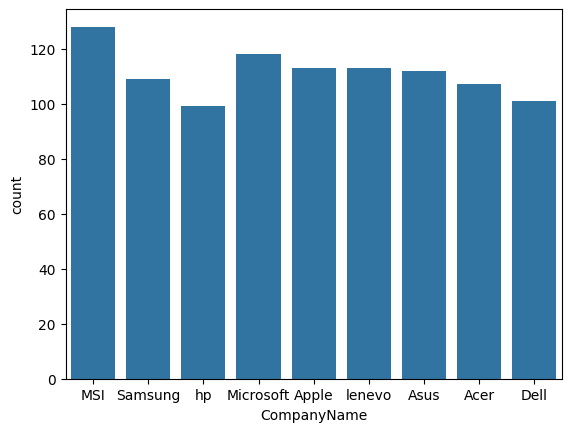

In [51]:
## Plotting countplot for column company name, to count the observation within different categories.
sns.countplot(x = df["CompanyName"])
plt.show() 

In [ ]:
### To analyse the relation between two columns we use "crosstab".
## To get the number of laptops according to type of laptops as per comapany.
pd.crosstab(df["CompanyName"], df["TypeOfLaptop"])

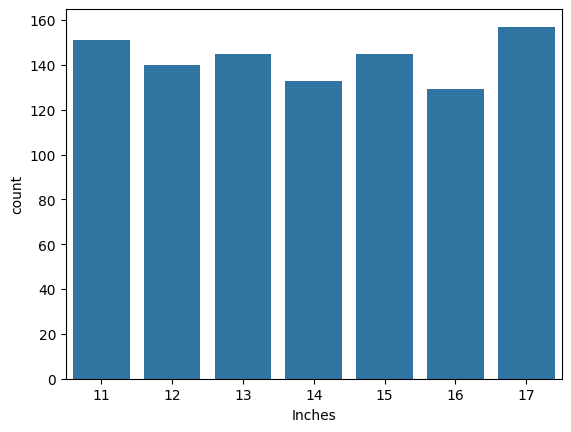

In [53]:
## Plotting countplot for column Inches, to count the observation within different laptop inches.
sns.countplot(x = df["Inches"])
plt.show() 

In [54]:
## To get the unique prices
df["Price"].value_counts()

Price
35844.099371    1
31817.104796    1
41862.385994    1
32910.212361    1
37352.222969    1
               ..
55193.683114    1
80674.069261    1
56514.471727    1
61624.305110    1
63873.992922    1
Name: count, Length: 1000, dtype: int64

In [55]:
## To get the price of laptop a/c to type used group by function
rev_device = df.groupby("TypeOfLaptop")["Price"].mean()

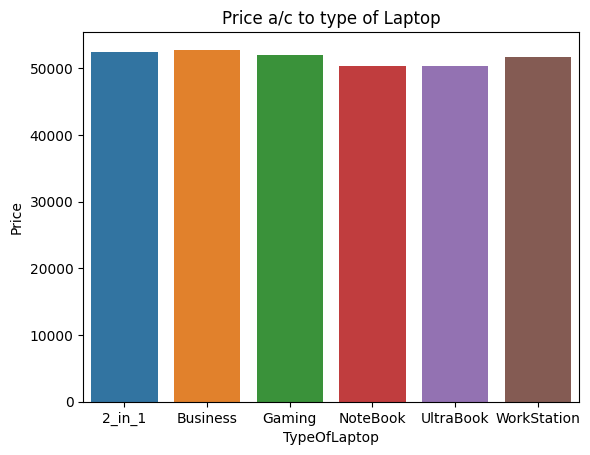

In [56]:
## Compared price of laptop a/c to type
plt.title("Price a/c to type of Laptop")
sns.barplot(x=rev_device.index, y = rev_device.values, hue = rev_device.index)
plt.ylabel("Price")
plt.show()

In [57]:
## To get count unique Inches of laptop
df["Inches"].value_counts()

Inches
17    157
11    151
15    145
13    145
12    140
14    133
16    129
Name: count, dtype: int64

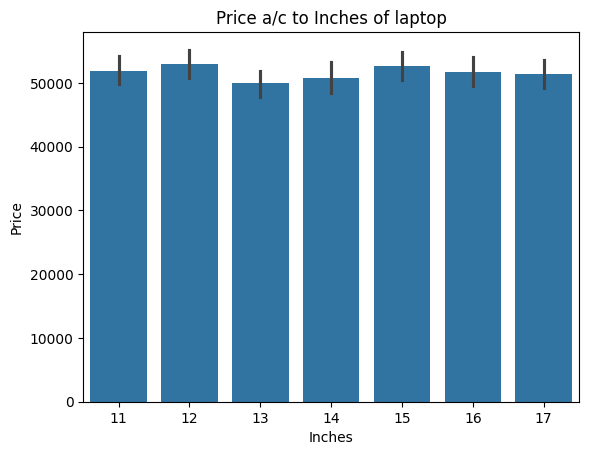

In [68]:
## Plotting bar plot for Inches and Price of Laptop
plt.title("Price a/c to Inches of laptop")
sns.barplot(x= df["Inches"], y = df["Price"])
plt.show()

In [59]:
## To get the number of laptops according to type of laptops as per OpsSys.
pd.crosstab(df["TypeOfLaptop"], df["OpSys"])

OpSys,DOS,Linux,Win10,Win11,macOS
TypeOfLaptop,,,,,
2_in_1,39,21,38,28,36
Business,38,33,39,36,30
Gaming,30,37,36,28,37
NoteBook,35,29,27,29,33
UltraBook,37,28,29,32,40
WorkStation,45,39,25,23,43


In [60]:
## To get the number of laptops according to type of laptops as per Inches.
pd.crosstab(df["TypeOfLaptop"], df["Inches"])

Inches,11,12,13,14,15,16,17
TypeOfLaptop,,,,,,,
2_in_1,20,27,27,18,27,24,19
Business,29,21,22,23,23,29,29
Gaming,29,16,33,25,22,22,21
NoteBook,26,28,19,16,23,14,27
UltraBook,17,21,22,25,29,22,30
WorkStation,30,27,22,26,21,18,31


In [61]:
## Getting count of unique screen resolution for laptops 
df["ScreenResolution"].value_counts()

ScreenResolution
2K                181
4K                179
TouchScreen       176
Full HD           162
HD 1920x1080      160
Retina Display    142
Name: count, dtype: int64

In [62]:
## To get the price of laptop a/c to Screen Resolution used group by function
screen_res_price = df.groupby("ScreenResolution")["Price"].mean()

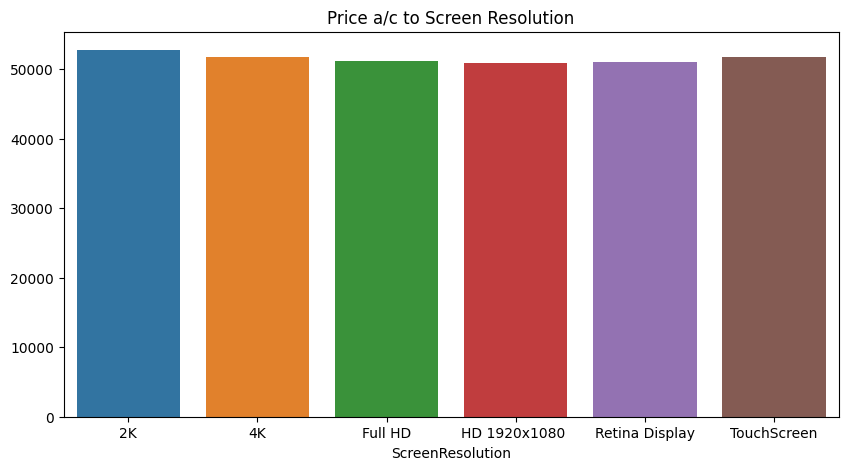

In [63]:
## Plotting bar plot for screen resolution and Price of Laptops.
plt.figure(figsize=(10,5))
plt.title("Price a/c to Screen Resolution")
sns.barplot(x=screen_res_price.index, y = screen_res_price.values, hue = screen_res_price.index)
plt.show()

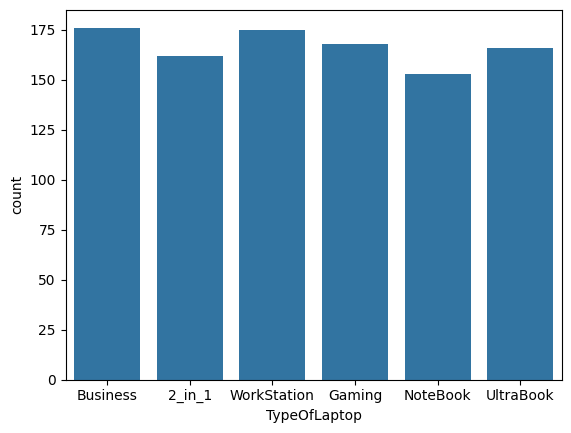

In [64]:
## Plotted count plot of type of laptop to get the number of laptops a/c to type.
sns.countplot(x = df["TypeOfLaptop"])
plt.show()

In [65]:
### To analyse the relation between two columns we use "crosstab".
## To get the number of laptops according to type of laptops as per Ram
pd.crosstab(df["TypeOfLaptop"],df["Ram"])

Ram,4,8,12,16
TypeOfLaptop,,,,
2_in_1,40,44,45,33
Business,42,45,53,36
Gaming,30,51,40,47
NoteBook,40,36,41,36
UltraBook,44,48,37,37
WorkStation,47,46,31,51


In [66]:
### To analyse the relation between two columns we use "crosstab".
## To get the number of laptops according to type of laptops as per Gpu
pd.crosstab(df["TypeOfLaptop"],df["Gpu"])

Gpu,AMD,Intel,NVIDIA
TypeOfLaptop,,,
2_in_1,47,54,61
Business,65,49,62
Gaming,56,50,62
NoteBook,52,50,51
UltraBook,55,52,59
WorkStation,64,58,53


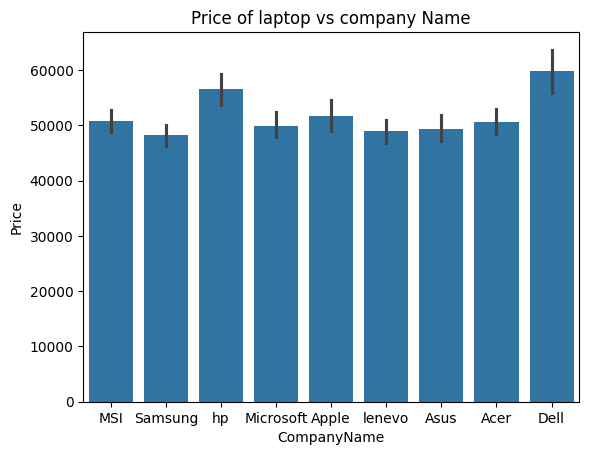

In [75]:
## Visualising the price of laptop as per the company Name
plt.title("Price of laptop vs company Name")
sns.barplot(x= df["CompanyName"], y = df["Price"])
plt.show()

In [71]:
## Data Query
df.query("Inches == 17")

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD
0,MSI,Business,17,Retina Display,Intel i7,12,Intel,Linux,2.064834,35844.099371,512GB,0
2,hp,WorkStation,17,Full HD,Intel Xeon,8,Intel,Linux,2.901689,33329.360341,0,1024
7,Asus,UltraBook,17,TouchScreen,Intel Celeron,12,NVIDIA,macOS,4.402627,35919.072831,256GB,0
19,Samsung,WorkStation,17,Retina Display,Intel i9,12,AMD,Linux,4.308988,64759.503411,2TB,0
26,Asus,Business,17,TouchScreen,AMD 7,16,NVIDIA,macOS,2.971002,43514.934748,0,1024
...,...,...,...,...,...,...,...,...,...,...,...,...
977,Apple,2_in_1,17,Full HD,Intel i5,4,Intel,macOS,4.145524,40438.382708,256GB,0
983,Microsoft,WorkStation,17,2K,Intel Celeron,8,Intel,DOS,4.353292,43896.754079,256GB,0
988,MSI,NoteBook,17,HD 1920x1080,Intel Atom,16,AMD,DOS,3.365919,32364.429847,2TB,0
992,lenevo,UltraBook,17,4K,Intel Xeon,8,NVIDIA,macOS,2.748768,33751.485105,1TB,0


In [74]:
df.query("Ram == 16 and TypeOfLaptop == '2_in_1'")

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD
3,MSI,2_in_1,11,2K,Intel i7,16,Intel,Win10,2.914843,68631.102486,512GB,0
36,hp,2_in_1,15,HD 1920x1080,Intel Atom,16,NVIDIA,DOS,3.470843,49294.292481,2TB,0
57,MSI,2_in_1,13,HD 1920x1080,Intel Celeron,16,Intel,Win10,3.718543,61479.849352,0,2048
61,Microsoft,2_in_1,17,TouchScreen,Intel i5,16,Intel,macOS,3.354578,32579.902620,256GB,0
128,hp,2_in_1,16,HD 1920x1080,AMD A9,16,Intel,DOS,3.586858,63003.847260,1TB,0
153,Apple,2_in_1,16,4K,AMD 5,16,NVIDIA,DOS,4.307612,60057.631649,128GB,0
231,lenevo,2_in_1,16,HD 1920x1080,Intel i9,16,AMD,Win11,3.451548,63270.446335,256GB,0
257,Microsoft,2_in_1,14,HD 1920x1080,Intel Xeon,16,NVIDIA,macOS,2.800435,58712.692949,256GB,0
273,Apple,2_in_1,12,TouchScreen,Intel i5,16,Intel,DOS,4.370684,43177.194911,256GB,0
274,Microsoft,2_in_1,11,4K,Intel Pentium,16,AMD,macOS,4.572192,46367.591604,256GB,0
